In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [132]:
cancer = pd.read_csv('D:\\UOJ\\SEMESTER 6\\MACHINE LEARNING\\2017E082_LAB_5\\breast_cancer_wisconsin_data.csv',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
cancer.drop(labels= 'Sample code number' , axis = 1 , inplace=True )
cancer

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [133]:
print('Clump Thickness unique:',format(cancer['Clump Thickness'].unique()))
print('Uniformity of Cell Size unique:',format(cancer['Uniformity of Cell Size'].unique()))
print('Uniformity of Cell Shape unique:',format(cancer['Uniformity of Cell Shape'].unique()))
print('Marginal Adhesion unique:',format(cancer['Marginal Adhesion'].unique()))
print('Single Epithelial Cell Size unique:',format(cancer['Single Epithelial Cell Size'].unique()))
print('Bare Nuclei unique:',format(cancer['Bare Nuclei'].unique()))
print('Bland Chromatin unique:',format(cancer['Bland Chromatin'].unique()))
print('Normal Nucleoli unique:',format(cancer['Normal Nucleoli'].unique()))
print('Mitoses unique:',format(cancer['Mitoses'].unique()))
print('Class unique:',format(cancer['Class'].unique()))

Clump Thickness unique: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size unique: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape unique: [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion unique: [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size unique: [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei unique: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bland Chromatin unique: [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli unique: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses unique: [ 1  5  4  2  3  7 10  8  6]
Class unique: [2 4]


In [134]:
# check for null and different format data
cancer.info()
object_col = cancer.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(cancer[col].value_counts(dropna=False)/cancer.shape[0],'\n')

for col in object_col:
    cancer.loc[cancer[col]=='?', col] = np.nan
    
# Perform an missing assessment in each column of the dataset.
col_missing_pct = cancer.isna().sum()/cancer.shape[0]
col_missing_pct.sort_values(ascending=False)

# Remove data entries with missing value
cancer = cancer.dropna(axis=0, how='any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
1     0.575107
10    0.188841
5     0.042918
2     0.042918
3     0.040057
8     0.030043
4     0.027182
?     0.022890
9     0.012876
7     0.011445
6     0.00

In [135]:
print('Clump Thickness unique:',format(cancer['Clump Thickness'].unique()))
print('Uniformity of Cell Size unique:',format(cancer['Uniformity of Cell Size'].unique()))
print('Uniformity of Cell Shape unique:',format(cancer['Uniformity of Cell Shape'].unique()))
print('Marginal Adhesion unique:',format(cancer['Marginal Adhesion'].unique()))
print('Single Epithelial Cell Size unique:',format(cancer['Single Epithelial Cell Size'].unique()))
print('Bare Nuclei unique:',format(cancer['Bare Nuclei'].unique()))
print('Bland Chromatin unique:',format(cancer['Bland Chromatin'].unique()))
print('Normal Nucleoli unique:',format(cancer['Normal Nucleoli'].unique()))
print('Mitoses unique:',format(cancer['Mitoses'].unique()))
print('Class unique:',format(cancer['Class'].unique()))

Clump Thickness unique: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size unique: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape unique: [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion unique: [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size unique: [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei unique: ['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']
Bland Chromatin unique: [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli unique: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses unique: [ 1  5  4  2  3  7 10  8  6]
Class unique: [2 4]


In [136]:
X=cancer.drop('Class', axis=1)
Y = cancer["Class"]

In [137]:
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
data_binary=scaler.fit_transform(X)

#spliting train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y)

Accuracy 0.9707602339181286%
Precision 0.9649122807017543%
Recall 0.9690993788819876%
F1 0.9669590756270046%


Text(33.0, 0.5, 'Actual classes')

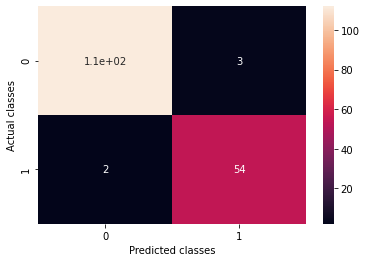

In [138]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

#Accuracy , Precision , recall, F1 scores
accuracy_KNN = accuracy_score(y_test, KNN_pred)
precision_KNN =precision_score(y_test, KNN_pred, average='macro')
recall_KNN = recall_score(y_test, KNN_pred, average='macro')
f1_KNN =f1_score(y_test, KNN_pred, average='macro')

#print the score 
print('Accuracy {}%'.format(accuracy_KNN))
print('Precision {}%'.format(precision_KNN))
print('Recall {}%'.format(recall_KNN))
print('F1 {}%'.format(f1_KNN))

con_mat=confusion_matrix(y_test, KNN_pred)
#show the heat map
sns.heatmap(con_mat, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [139]:
 print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       115
           4       0.95      0.96      0.96        56

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



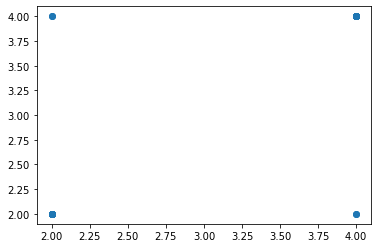

In [120]:
plt.scatter(KNN_pred,y_test)
plt.show()